<a href="https://colab.research.google.com/github/amazingashis/Blog/blob/main/Simple_and_Multiple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

In [15]:
data = pd.read_csv('/content/headbrain.csv')
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [16]:
x = data["Head Size(cm^3)"]
y = data["Brain Weight(grams)"]

In [17]:
print(x)
print(y)

0      4512
1      3738
2      4261
3      3777
4      4177
       ... 
232    3214
233    3394
234    3233
235    3352
236    3391
Name: Head Size(cm^3), Length: 237, dtype: int64
0      1530
1      1297
2      1335
3      1282
4      1590
       ... 
232    1110
233    1215
234    1104
235    1170
236    1120
Name: Brain Weight(grams), Length: 237, dtype: int64


# **Visualize the data**

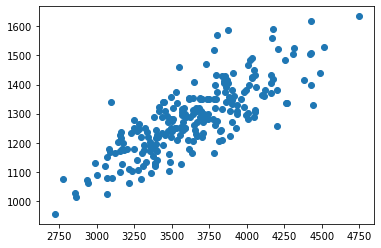

In [18]:
plt.scatter(x,y)
plt.show()

In [19]:
type(x)

pandas.core.series.Series

In [33]:
X = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)
y.shape

(237, 1)

In [35]:
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
print(model.score(X,y))

0.639311719957


# **Visualize**

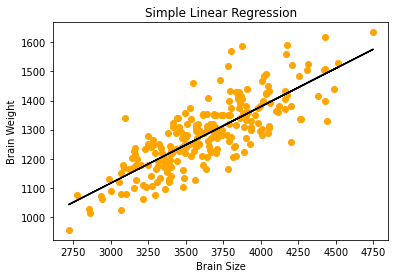

In [39]:
plt.scatter(X,y,color = 'orange')
plt.plot(X,model.predict(X),color = 'black')
plt.title("Simple Linear Regression")
plt.xlabel("Brain Size")
plt.ylabel("Brain Weight")
plt.show()

In [42]:
print(model.predict([[2000]]))

[[852.43210003]]


In [50]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [44]:
datamul = pd.read_csv('/content/50_Startups.csv')
datamul.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [57]:
X1 = datamul[["R&D Spend","Administration","Marketing Spend","State"]]
print(X1)
y1 = datamul["Profit"]
print(y1)

    R&D Spend  Administration  Marketing Spend       State
0   165349.20       136897.80        471784.10    New York
1   162597.70       151377.59        443898.53  California
2   153441.51       101145.55        407934.54     Florida
3   144372.41       118671.85        383199.62    New York
4   142107.34        91391.77        366168.42     Florida
5   131876.90        99814.71        362861.36    New York
6   134615.46       147198.87        127716.82  California
7   130298.13       145530.06        323876.68     Florida
8   120542.52       148718.95        311613.29    New York
9   123334.88       108679.17        304981.62  California
10  101913.08       110594.11        229160.95     Florida
11  100671.96        91790.61        249744.55  California
12   93863.75       127320.38        249839.44     Florida
13   91992.39       135495.07        252664.93  California
14  119943.24       156547.42        256512.92     Florida
15  114523.61       122616.84        261776.23    New Yo

In [47]:
type(X1)

pandas.core.frame.DataFrame

# **Preprocessing**

In [53]:
le = LabelEncoder()
X1[['State']] = le.fit_transform(datamul.State)
print(X1.values)

[[1.6534920e+05 1.3689780e+05 4.7178410e+05 2.0000000e+00]
 [1.6259770e+05 1.5137759e+05 4.4389853e+05 0.0000000e+00]
 [1.5344151e+05 1.0114555e+05 4.0793454e+05 1.0000000e+00]
 [1.4437241e+05 1.1867185e+05 3.8319962e+05 2.0000000e+00]
 [1.4210734e+05 9.1391770e+04 3.6616842e+05 1.0000000e+00]
 [1.3187690e+05 9.9814710e+04 3.6286136e+05 2.0000000e+00]
 [1.3461546e+05 1.4719887e+05 1.2771682e+05 0.0000000e+00]
 [1.3029813e+05 1.4553006e+05 3.2387668e+05 1.0000000e+00]
 [1.2054252e+05 1.4871895e+05 3.1161329e+05 2.0000000e+00]
 [1.2333488e+05 1.0867917e+05 3.0498162e+05 0.0000000e+00]
 [1.0191308e+05 1.1059411e+05 2.2916095e+05 1.0000000e+00]
 [1.0067196e+05 9.1790610e+04 2.4974455e+05 0.0000000e+00]
 [9.3863750e+04 1.2732038e+05 2.4983944e+05 1.0000000e+00]
 [9.1992390e+04 1.3549507e+05 2.5266493e+05 0.0000000e+00]
 [1.1994324e+05 1.5654742e+05 2.5651292e+05 1.0000000e+00]
 [1.1452361e+05 1.2261684e+05 2.6177623e+05 2.0000000e+00]
 [7.8013110e+04 1.2159755e+05 2.6434606e+05 0.0000000e+0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [55]:
from sklearn.compose import ColumnTransformer


In [58]:
st = ColumnTransformer([("State", OneHotEncoder(), [3])], remainder = 'passthrough')
X1 = st.fit_transform(X1)
print(X1)

[[0.0000000e+00 0.0000000e+00 1.0000000e+00 1.6534920e+05 1.3689780e+05
  4.7178410e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.6259770e+05 1.5137759e+05
  4.4389853e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.5344151e+05 1.0114555e+05
  4.0793454e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.4437241e+05 1.1867185e+05
  3.8319962e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.4210734e+05 9.1391770e+04
  3.6616842e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.3187690e+05 9.9814710e+04
  3.6286136e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.3461546e+05 1.4719887e+05
  1.2771682e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.3029813e+05 1.4553006e+05
  3.2387668e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.2054252e+05 1.4871895e+05
  3.1161329e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.2333488e+05 1.0867917e+05
  3.0498162e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.0191308e+05 1.1059411e+05
  2.2916095e+05]
 [1.0000000e+00 0.000

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1,y1, test_size=0.2, random_state=0)

In [60]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
y_pred = model.predict(X_test)

In [62]:
print(y_pred.sum().mean())
print(y_test.sum().mean())

1183253.9675519639
1222774.07


# **Accuracy**

In [63]:
print(" Accuracy ", y_pred.sum().mean()/y_test.sum().mean())

 Accuracy  0.9676799636027315
